In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
df_bitcoin = pd.read_csv("BTC-USD.csv")

In [5]:
df_bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [7]:
df_bitcoin.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
2783,2022-05-01,37713.265625,38627.859375,37585.789063,38469.093750,38469.093750,27002760110
2784,2022-05-02,38472.187500,39074.972656,38156.562500,38529.328125,38529.328125,32922642426
2785,2022-05-03,38528.109375,38629.996094,37585.621094,37750.453125,37750.453125,27326943244
2786,2022-05-04,37748.011719,39902.949219,37732.058594,39698.371094,39698.371094,36754404490
2787,2022-05-05,39727.386719,39788.441406,39444.644531,39568.812500,39568.812500,34693083136


In [9]:
df_bitcoin.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2788.000000,2788.000000,2788.000000,2788.000000,2788.000000,2.788000e+03
mean,12114.051628,12432.075536,11764.920824,12126.416572,12126.416572,1.504640e+10
std,16612.538889,17044.777808,16119.346993,16615.381435,16615.381435,1.988339e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,612.573471,618.876495,609.665756,613.742477,613.742477,8.317548e+07
50%,6457.810059,6549.650147,6353.985107,6466.239990,6466.239990,5.401853e+09
75%,11024.040039,11388.611572,10722.320557,11056.325195,11056.325195,2.558002e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [15]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2788 entries, 0 to 2787
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2788 non-null   object 
 1   Open       2788 non-null   float64
 2   High       2788 non-null   float64
 3   Low        2788 non-null   float64
 4   Close      2788 non-null   float64
 5   Adj Close  2788 non-null   float64
 6   Volume     2788 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 152.6+ KB


In [17]:
# Check for missing values

df_bitcoin.isnull().sum()]

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [31]:
# Check for duplicates

duplicates = df_bitcoin.duplicated()
print(f"Number of duplicated row: {duplicates.sum()}")

Number of duplicated row: 0


## Exploratory Data Analysis

### 1. Trend of Bitcoin's Closing price Over Time

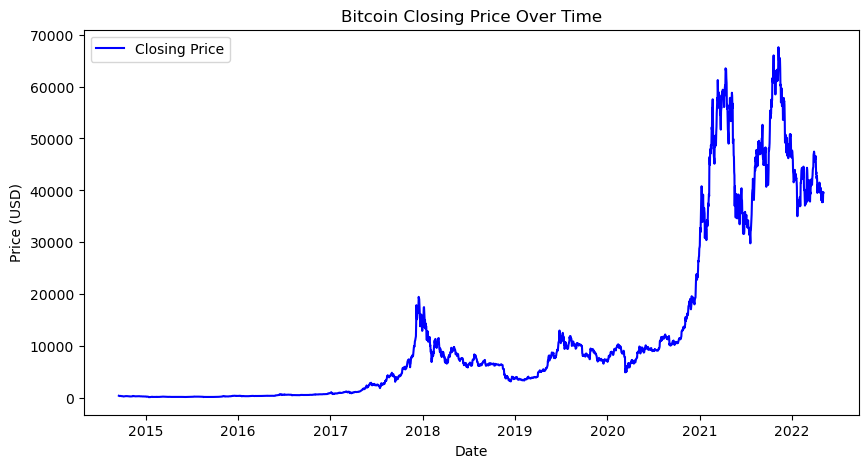

In [41]:
# Convert 'date' to datetime

df_bitcoin['Date'] = pd.to_datetime(df_bitcoin['Date'])

# Plot the closing price trend
plt.figure(figsize=(10,5))
plt.plot(df_bitcoin['Date'], df_bitcoin['Close'], label='Closing Price', color='blue')
plt.title('Bitcoin Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## 2. Daily Volatility
### Calculate and visualize the daily price range (high-low) to analyze volatility

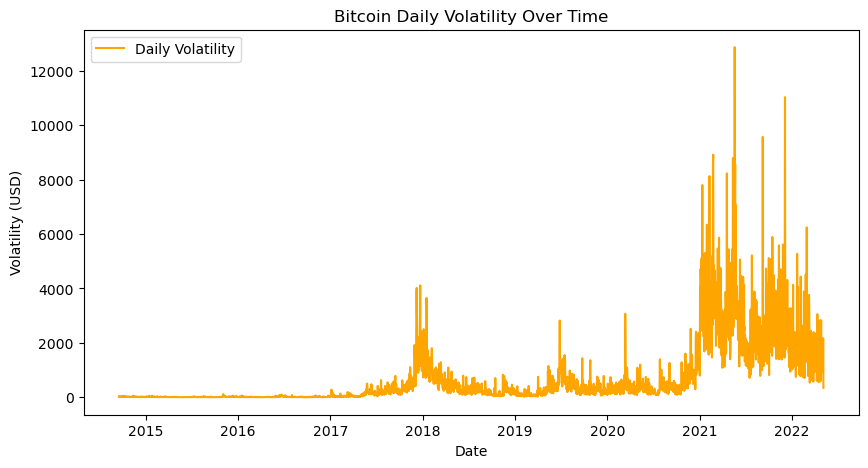

In [56]:
# Calculate the daily volatility

df_bitcoin['Volatility'] = df_bitcoin['High'] - df_bitcoin['Low']


# Plot volatility
plt.figure(figsize=(10, 5))
plt.plot(df_bitcoin['Date'], df_bitcoin['Volatility'], label='Daily Volatility', color='orange')
plt.title('Bitcoin Daily Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility (USD)')
plt.legend()
plt.show()

## 3. Highest and Lowest Trading Volume
### Identify the dates with the higest and lowest trading volume

In [60]:
# Find dates with highest and lowest volume trading volumes

max_volume_date = df_bitcoin[df_bitcoin['Volume'] == df_bitcoin['Volume'].max()]['Date'].values[0]
min_volume_date = df_bitcoin[df_bitcoin['Volume'] == df_bitcoin['Volume'].min()]['Date'].values[0]

print(f"Date with the highest volume: {max_volume_date}")
print(f"Date with lowest volume: {min_volume_date}") 

Date with the highest volume: 2021-02-26T00:00:00.000000000
Date with lowest volume: 2014-10-19T00:00:00.000000000


## 4. Correlation Between Volume and Price Movement
### Lets check if higher trading volumes coincide with larger price changes

In [63]:
# Calculate price movement

df_bitcoin['price_change'] = df_bitcoin['Close'] - df_bitcoin['Open']

# correlation between volume and price movement

correlation = df_bitcoin['Volume'].corr(df_bitcoin['price_change'])
print(f"Correlation between volume and price movement: {correlation}")

Correlation between volume and price movement: -0.015621837373410413


In [15]:
# Percentage change in price

df_bitcoin['percentage_change'] = df_bitcoin['Close'].pct_change() * 100

# Calculate the correlation between 'volume' and 'percentage_change'

correlation = df_bitcoin['percentage_change'].corr(df_bitcoin['Volume'])

#Print the result
print("Correlation between trading volume and percentage price change:", correlation)

Correlation between trading volume and percentage price change: 0.002249449224889365


Text(0, 0.5, 'Percentage Change in Price')

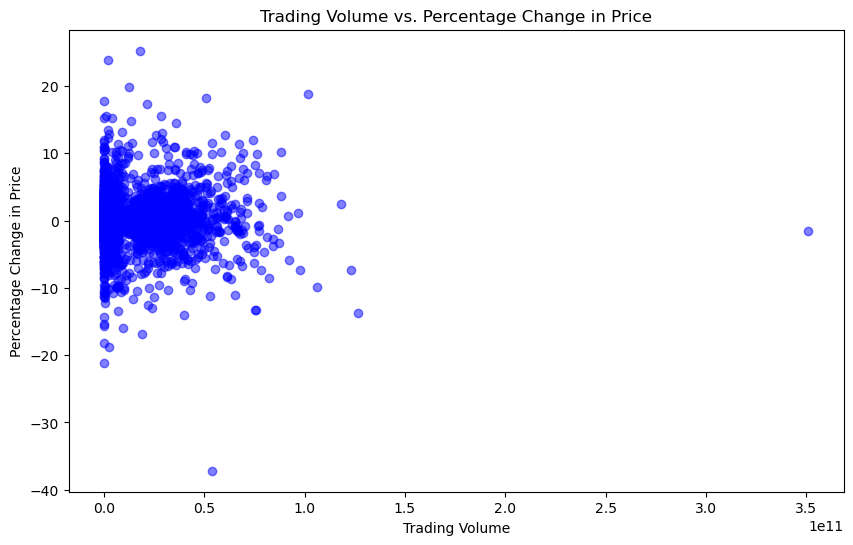

In [17]:
# Visualize the relationship

plt.figure(figsize=(10, 6))
plt.scatter(df_bitcoin['Volume'], df_bitcoin['percentage_change'], alpha=0.5, color='blue')
plt.title('Trading Volume vs. Percentage Change in Price')
plt.xlabel('Trading Volume')
plt.ylabel('Percentage Change in Price')

## 5. Adjusted Closing Price Analysis

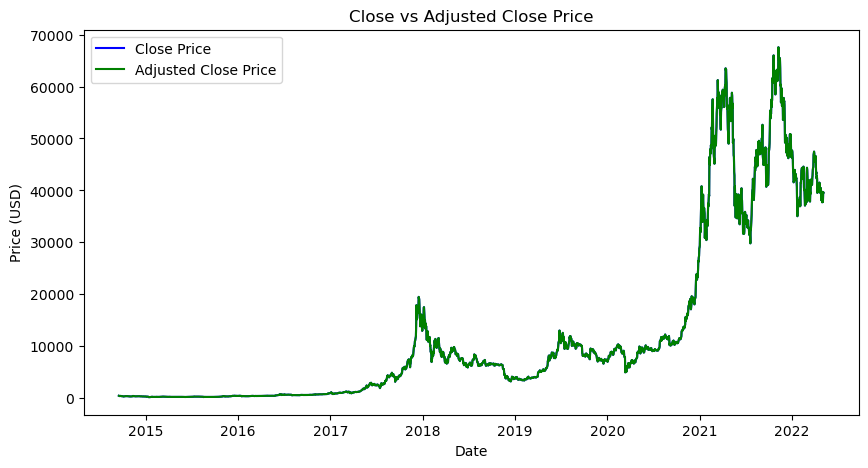

In [70]:
# Plot adjusted close vs. close 

plt.figure(figsize=(10, 5))
plt.plot(df_bitcoin['Date'], df_bitcoin['Close'], label='Close Price', color='blue')
plt.plot(df_bitcoin['Date'], df_bitcoin['Adj Close'], label='Adjusted Close Price', color='green')
plt.title('Close vs Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

## Insight from the dataset

### 1. Market Trends: The price (Close) trends indicate periods of significant volatility, with noticeable highs and lows

### 2. Volume Correlation: The trading volume showed weak or no correlation with daily percentage price changes, indicating that price volatility isn't strongly driven by volume in the dataset.

### 3. Price Dynamics: The average price and the difference between high and low values on a daily basis suggest potential periods of market manipulation or high investor activity.

### 4. Long-term Pattern: Adjusted close price trends align closely with the close price trends, suggesting minor impacts from market adjustment like dividends.

### 5. Anomalies: Potential outliers or anomalies in trading volume or price may need further investigation, especially on days with unusally high volume or extreme price changes.

## Questions to Ask Stakeholders:

### For Investors or Finance Teams:

### 1. Price Movement Drivers: What external factors(news, events, regulations) are influencing significant price movements during high volatility periods?

### 2. Risk Assessment: Which price periods indicate the highest risk or opportunity for trading strategies?

### 3. Volume Insights: Can we identify specific timeframe where increased trading volume leads to profitable opportunities?

### For Strategist or Product Teams:

### 4. Market Behavior: Do specific price patterns or volume trends align with planned events( eg., product launches or marketing campaigns)

### 5. Anomalies: Are there any identifiable reasons for the anomalies or outliers in the dataset? Could they indicate system inefficeincies or market manipulation?